# $$Support~Vector~ Machines(SVM)$$

### $$Conceito:$$

-----------------------------------------------------------------------------------------------------------------------

Objetivo do algoritmo SVM é encontrar a melhor linha para o hiperplano (linearmente separável), que faça com que os pontos mais próximos de cada classe da variável target tenham a mesma distância para o hiperplano, com a maior margem entre os pontos, ou seja, a distância máxima entre os pontos de dados das classes, fornece um limite para que os pontos de dados futuros possam ser classificados com mais confiança.

-----------------------------------------------------------------------------------------------------------------------

### $$Contrução~do~SVM:$$



**Hiperplano:** Modelo SVM calcula o Hiperplano através dos limites dos pontos de cada uma das classes, e traça uma linha no meio da divisão separando as classes, o hiperplano tem que estar exatamente no meio dos limites das divisões


**Margem:** É a maior distância entre as classes de dados mais próximas, tanto superior como inferior, após encontra a maior margem entre os pontos de dados é traçado o hiperplano 


**Support Vector:** Para encontra a maior distância entre as classes usamos o Suport Vector: que são os pontos de dados de cada classe mais próximos um do outro, assim encontramos a maior margem e traçamos o melhor hiperplano


**Pontos de Vector de Suporte:** São os dados mais próximos do hiperplano 


### $$Caracteristicas~do ~modelo:$$


- **Soft Margin** = Tolera algumas violações tanto na margem como no hiperplano


- **SVC** = Classificador de vetores de suporte e **SVR** = Regressão de vetores de suporte


- **Padronização** = O algoritmo SVM tem a premissa de transformar os dados na mesma escala


- **Reta:** Traçamos quando temos 2 dimensões, **Plano:** 3 ou mais dimensões


**OBS: Como o hiperplano é traçado através dos pontos de dados mais próximos de cada classe, devemos observar os outliers para que não influencie nesse cálculo**


**Em caso de outliers o modelo SVM busca a melhor forma possível de classificação e, se necessário, desconsidera os outliers**


-----------------------------------------------------------------------------------------------------------------------

### $$Kernel ~Trick:$$ 

O Modelo SVM faz a separação dos dados linearmente separáveis (Dot Product) e não linearmente separáveis (Kernel Trick), caso os dados não sejam linearmente separáveis o SVM aplica o truque do kernel e eleva os dados a uma dimensão a mais, facilitando a separação entre eles

**Tipos de Kernels:**


- **Linear:**  Elevando todos os dados ao quadrado conseguimos criar uma dimensão a mais e através de um plano conseguimos separar os dados 


- **Gaussiano(RBF):**  Resolver problemas não linearmente separáveis ,através do mapeamento para um espaço de 
maior dimensão. Exige a presença de 2 parâmetros: γ (gamma) e C (custo).


- **Polinomial:** Aprendizado de modelos não lineares, Exige a presença de 3 parâmetros: C (custo), γ (gamma) e o grau (degree).


- **Sigmoide:** Equivalente à utilização de uma rede neural de duas camadas (rede perceptron) usando uma função de ativação sigmoide

-

### $$Parâmetros Importantes:$$

- **Kernel** = Seleciona o tipo de hiperplano usado para separar os dados.


- **SVM Margem Rígida** = Os pontos de dados são perfeitamente separáveis, não aceita dados incorretos


- **Margem Flexível** = Usado quando tem alguns pontos de dados que são classificados incorretamente


- **Parametro de Regularização C(Custo):** = Parâmetro de penalidade dos termos de erro, o valor do parametro determina o quanto o algoritmo pode errar, se o valor de C for baixo a largura da margem é maior, permitindo o algoritmo errar mais, pois a classificação correta só se dá fora da margem, podendo levar ao overfitting


- **Gamma** = Parâmetro para hiperplanos não lineares. Quanto maior o valor de gama, mais ele tenta ajustar-se exatamente ao conjunto de dados de treinamento.

-----------------------------------------------------------------------------------------------------------------------


**Exceção para o uso do SVM:**

**Tempo de treinamento é muito custoso, não funciona muito bem em dados com grandes volumes**

- **Ruídos:** Caso os dados tiverem muitos ruídos podem não ter resultados expressivos

-----------------------------------------------------------------------------------------------------------------------

### $$Tipo~ de~ distribuição:$$

SVM Pode ser usado tanto para classificação como regressão, porém os modelos de classificação são superiores aos outros algoritmos, o que não acontece com o modelo de regressão.


- **Variáveis:** Usar as variáveis explicativas sem correlações entre si



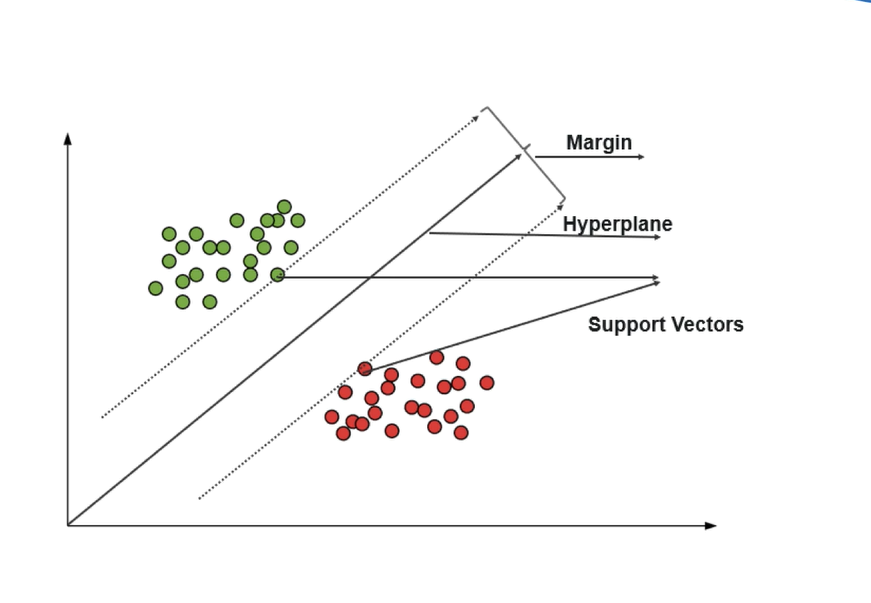

In [1]:
#SMV
from IPython.display import Image
Image(filename="svm.png")

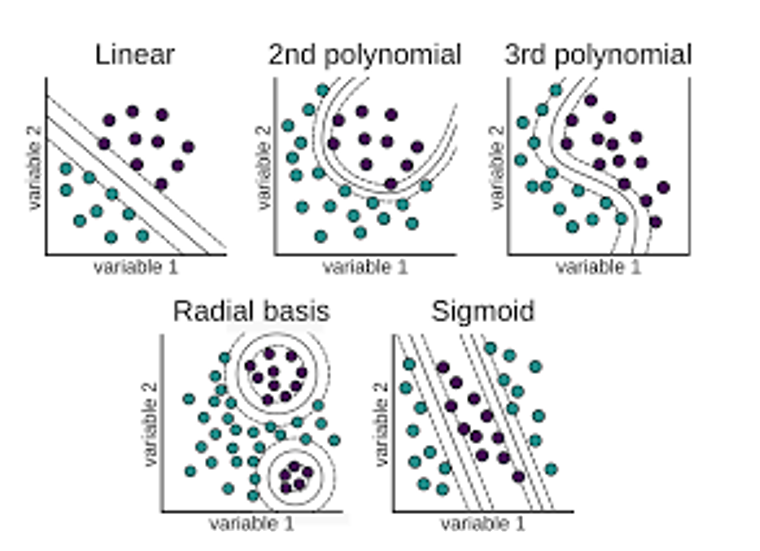

In [2]:
#Tipos de Kernels
from IPython.display import Image
Image(filename="kernels.png")

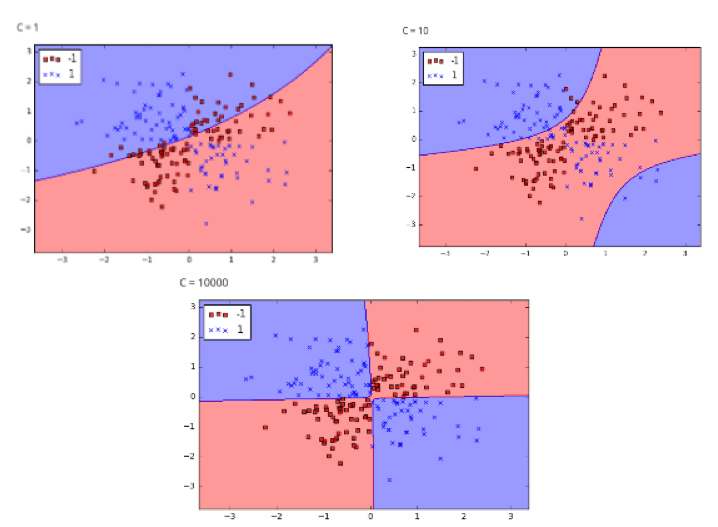

In [3]:
#Parametro do custo 
from IPython.display import Image
Image(filename="C.png")


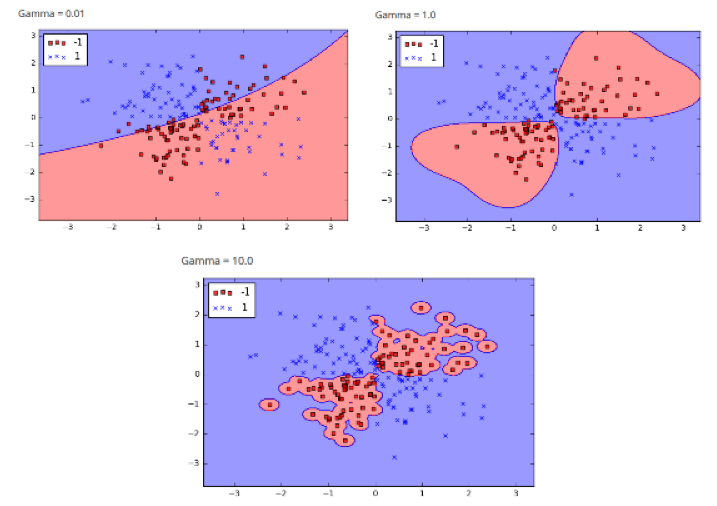

In [4]:
#Parametro Gamma 
from IPython.display import Image
Image(filename="gamma.png")

__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

## $$Objetivo:$$

## $$Usar ~o ~algoritmo~ SVM~ para~ identificar~ se ~a~ visita$$$$~ do ~usuario~ ao~ site~ de~ E-commerce~ gerou ~vendas$$

__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

In [1]:
#Importar as bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

from time import time

# Banco de dados 

In [2]:
dados = pd.read_csv('online_shoppers.csv',encoding='latin1',sep=',')
dados


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


**São 12.330 linhas e 18 variáveis**

# Análise Exploratória

In [3]:
#Tipo de dados
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

**São 16 variáveis numéricas e 2 categóricas**

**OBS: Uma das premissas do algoritmo SVM é ter somente variáveis preditoras numéricas, portanto, as variáveis categóricas: 'Month' e 'VisitorType' serão transformadas em dados numéricos**

## Transformar as variáveis qualitativas em quantitativas

In [4]:
#Verificar os dados da variavel Month
dados.Month.value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [5]:
#Verificar os dados da variavel VisitorType
dados.VisitorType.value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [6]:
#Aplicar transformação nos dados
dummies =  pd.get_dummies(dados[['Month','VisitorType']])
dados = dados.join(dummies)

#Drop
dados = dados.drop(['Month','VisitorType'],axis=1)
dados

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,0,0,0,0,1
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,1
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,1
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,1


In [7]:
#Tipo de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12316 non-null  float64
 1   Administrative_Duration        12316 non-null  float64
 2   Informational                  12316 non-null  float64
 3   Informational_Duration         12316 non-null  float64
 4   ProductRelated                 12316 non-null  float64
 5   ProductRelated_Duration        12316 non-null  float64
 6   BounceRates                    12316 non-null  float64
 7   ExitRates                      12316 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

**Note que as variáveis que estavam como categóricas agora foram transformadas em variáveis numéricas**

In [8]:
#Verificar os dados missing por coluna
dados.isnull().sum()

Administrative                   14
Administrative_Duration          14
Informational                    14
Informational_Duration           14
ProductRelated                   14
ProductRelated_Duration          14
BounceRates                      14
ExitRates                        14
PageValues                        0
SpecialDay                        0
OperatingSystems                  0
Browser                           0
Region                            0
TrafficType                       0
Weekend                           0
Revenue                           0
Month_Aug                         0
Month_Dec                         0
Month_Feb                         0
Month_Jul                         0
Month_June                        0
Month_Mar                         0
Month_May                         0
Month_Nov                         0
Month_Oct                         0
Month_Sep                         0
VisitorType_New_Visitor           0
VisitorType_Other           

**Como são poucos dados a serem tratados em relação ao tamanho do dataset podemos apenas excluir os dados**

In [9]:
#Excluir os dados missing
dados.dropna(inplace=True)

#Verificar dados missing
dados.isnull().sum()

Administrative                   0
Administrative_Duration          0
Informational                    0
Informational_Duration           0
ProductRelated                   0
ProductRelated_Duration          0
BounceRates                      0
ExitRates                        0
PageValues                       0
SpecialDay                       0
OperatingSystems                 0
Browser                          0
Region                           0
TrafficType                      0
Weekend                          0
Revenue                          0
Month_Aug                        0
Month_Dec                        0
Month_Feb                        0
Month_Jul                        0
Month_June                       0
Month_Mar                        0
Month_May                        0
Month_Nov                        0
Month_Oct                        0
Month_Sep                        0
VisitorType_New_Visitor          0
VisitorType_Other                0
VisitorType_Returnin

**Não há mais dados faltantes no dataset**

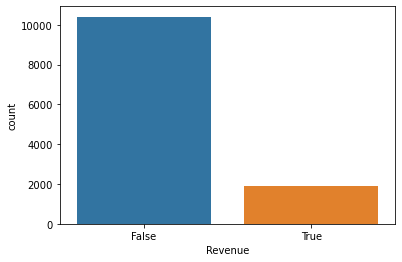

In [10]:
#Verificar a distribuição da variavel target
sns.countplot(x='Revenue',data=dados);

**Percebemos que a um desbalanceamento das classes da coluna target, isso pode interferir no resultado do algoritmo, precisamos balancear os dados usando o método SMOTE**

## Dividir os dados em treino e teste

In [11]:
x = dados.drop(['Revenue'],axis=1)
y = dados['Revenue']
x_treino,x_teste,y_treino ,y_teste = train_test_split(x,y,test_size=0.3, random_state=1)


**A técnica SMOTE só é aplicada nos dados de treinamento, por isso fazemos a divisão dos dados antes de aplicar a técnica**

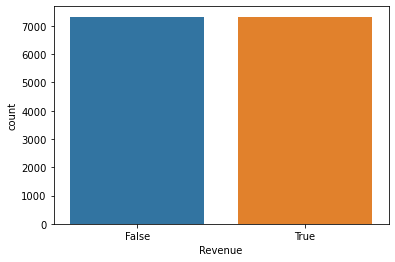

In [12]:
#Balancear os dados
from imblearn.over_sampling import SMOTE

# Separa X e y
x_desb = x_treino
y_desb = y_treino 

#Balancear os dados da coluna target
balance = SMOTE()
x_treino , y_treino = balance.fit_resample(x_desb,y_desb)

#Grafico 
sns.countplot(x = 'Revenue' , data = y_treino.to_frame());

**Agora as classes da coluna target estão balanceadas, isso é importante para que o algoritmo aprenda de forma proporcional ambas as classes em seu treinamento**

# Modelagem:

## 1° modelo será o mais simples , Kernel linear e sem padronizar os dados

In [19]:
start = time()
#Treinamento do modelo 1
from sklearn.svm import SVC

#Criar modelo
modelo_svm1 = SVC(random_state=1,kernel='linear')

#Treinar o modelo
modelo_svm1.fit(x_treino , y_treino)


#Previsões com o modelo de teste
previsoes_v1 = modelo_svm1.predict(x_teste)


# Dicionário de métricas e metadados
SVM_dict_v1 = {'Acurácia_Treino':modelo_svm1.score(x_treino, y_treino),
               'Acurácia_Teste':accuracy_score(previsoes_v1, y_teste),
               'Precision_Teste':precision_score(previsoes_v1, y_teste),
               'Recall_Teste':recall_score(previsoes_v1, y_teste),
               'AUC_Teste':roc_auc_score(y_teste, previsoes_v1)}
# Print
print("Métricas")
SVM_dict_v1

#Tempo de execução do modelo
print("\nExecução em %.2f segundos." 
      % ((time() - start)))

Métricas

Execução em 2367.46 segundos.


**Note que o treinamento foi realizado em aproximadamente 50 minutos, esse tempo é devido os dados não estarem padronizados**

<AxesSubplot:>

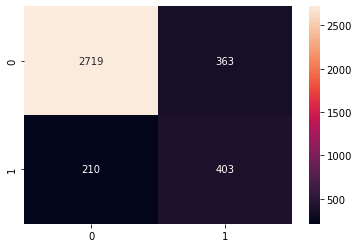

In [20]:
#Matriz de Confusao
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_teste,previsoes_v1)
sns.heatmap(cm,annot=True,fmt='d')

In [21]:
# Dicionário de métricas e metadados
SVM_dict_v1 = {'Acurácia_Treino':modelo_svm1.score(x_treino, y_treino),
               'Acurácia_Teste':accuracy_score(previsoes_v1, y_teste),
               'Precision_Teste':precision_score(previsoes_v1, y_teste),
               'Recall_Teste':recall_score(previsoes_v1, y_teste),
               'AUC_Teste':roc_auc_score(y_teste, previsoes_v1)}
# Print
print("Métricas")
SVM_dict_v1

Métricas


{'Acurácia_Treino': 0.8991946491946492,
 'Acurácia_Teste': 0.8449255751014885,
 'Precision_Teste': 0.6574225122349103,
 'Recall_Teste': 0.5261096605744126,
 'AUC_Teste': 0.7698209251635291}

**Em geral os dados de treino e teste não tem uma grande discrepância na acurácia, porém ao verificar as métricas 'Precision_Teste' e 'Recall_Teste' percebemos a diferença de acerto entre as 2 classes, mesmo aplicando a técnica SMOTE**

## 2° Modelo -  Padronizando os dados

In [22]:
#Padronização
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dados_balance_scaled = sc.fit_transform(x)
dados_scaled = sc.transform(x)
dados_scaled

array([[-0.69758164, -0.45747633, -0.39663062, ..., -0.39934988,
        -0.08336399,  0.4108937 ],
       [-0.69758164, -0.45747633, -0.39663062, ..., -0.39934988,
        -0.08336399,  0.4108937 ],
       [-0.69758164, -0.46313073, -0.39663062, ..., -0.39934988,
        -0.08336399,  0.4108937 ],
       ...,
       [-0.69758164, -0.45747633, -0.39663062, ..., -0.39934988,
        -0.08336399,  0.4108937 ],
       [ 0.50628797, -0.03339592, -0.39663062, ..., -0.39934988,
        -0.08336399,  0.4108937 ],
       [-0.69758164, -0.45747633, -0.39663062, ...,  2.50406989,
        -0.08336399, -2.43371947]])

In [23]:
#Dividir os dados em treino e teste novamente com os dados na mesma escala
x_treino1,x_teste1,y_treino1 ,y_teste1 = train_test_split(dados_scaled,y,test_size=0.3, random_state=1)

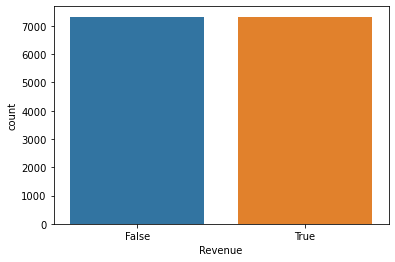

In [24]:
#Balancear os dados


# Separa X e y
x_desb = x_treino1 
y_desb = y_treino1 

#Balancear os dados da coluna target
balance = SMOTE()
x_balance , y_balance = balance.fit_resample(x_desb,y_desb)

#Grafico 
sns.countplot(x = 'Revenue' , data = y_balance.to_frame());

**2° modelo com os dados padronizados**

In [25]:
#Modelo 2
start = time()

#Treinamento do modelo 2
from sklearn.svm import SVC
modelo_svm2 = SVC(random_state=1)


modelo_svm2.fit(x_balance,y_balance)


#Previsões com o modelo de teste
previsoes_v2 = modelo_svm2.predict(x_teste1)


#Tempo de execução do modelo
print("\nExecução em %.2f segundos." 
      % ((time() - start)))


Execução em 7.13 segundos.


**Tempo de execução do 2° modelo = 6 segundos, alterando apenas a escala dos dados em relação ao 1° modelo**

<AxesSubplot:>

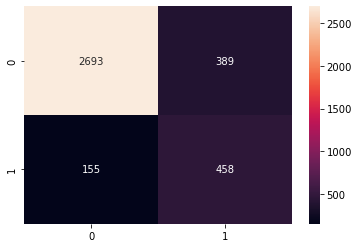

In [26]:
#Matriz de Confusão
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_teste1,previsoes_v2)
sns.heatmap(cm,annot=True,fmt='d')

In [27]:
# Dicionário de métricas e metadados
SVM_dict_v2 = {'Acurácia_Treino':modelo_svm2.score(x_balance, y_balance),
               'Acurácia_Teste':accuracy_score(previsoes_v2, y_teste1),
               'Precision_Teste':precision_score(previsoes_v2, y_teste1),
               'Recall_Teste':recall_score(previsoes_v2, y_teste1),
               'AUC_Teste':roc_auc_score(y_teste1, previsoes_v2)}
# Print
print("Métricas")
SVM_dict_v2

Métricas


{'Acurácia_Treino': 0.8939393939393939,
 'Acurácia_Teste': 0.8527740189445197,
 'Precision_Teste': 0.7471451876019576,
 'Recall_Teste': 0.5407319952774499,
 'AUC_Teste': 0.8104642226134383}

**Assim como no modelo 1, o algoritmo continua com problemas na classificação da classe 'True'**

## Comparação das metricas dos modelos

In [28]:
# Transformar em dataframe modelo1 
metricas = pd.DataFrame(list(SVM_dict_v1.items())).T
metricas['Modelos'] = ['Metricas','Modelo1']
metricas = metricas.set_index('Modelos')

# Transformar em dataframe modelo2 
metricas1 = pd.DataFrame(list(SVM_dict_v2.values())).T
metricas1 = metricas1.rename(index={0: 'Modelo2'})
metricas = pd.concat([metricas,metricas1])
metricas

,0,1,2,3,4
Metricas,Acurácia_Treino,Acurácia_Teste,Precision_Teste,Recall_Teste,AUC_Teste
Modelo1,0.899195,0.844926,0.657423,0.52611,0.769821
Modelo2,0.893939,0.852774,0.747145,0.540732,0.810464


**Com os dados padronizados o modelo 2 conseguiu ficar mais generalizável do que o modelo 1, percebemos isso com os valores das métricas: 'Acurácia_Teste' e 'AUC_Teste'**

## 3° Modelo -  Otimização dos Hiperparâmetros com Randomized Search

In [29]:
# start = time()
from sklearn.model_selection import RandomizedSearchCV

# Definição dos parâmetros
param_dist = {"C": [1,2,8],"kernel": ['linear', 'poly', 'rbf'],
              "gamma": [0.1,1,3]}

#Modelo SVM 3
modelo_svm3 = SVC(random_state=1)

# Usar o modelo SVC para otimização dos hiperparametros
SVC_rsearch = RandomizedSearchCV(modelo_svm3,param_distributions = param_dist, verbose=3,n_iter=3)

# Aplicando o resultado ao conjunto de dados de treino e obtendo o score
SVC_rsearch.fit(x_balance,y_balance)

#Previsões com o modelo de teste
previsoes_v3 = SVC_rsearch.predict(x_teste1)


#Tempo de execução do modelo
print("\nExecução em %.2f segundos." 
      % ((time() - start)))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ..........C=8, gamma=1, kernel=rbf;, score=0.949 total time=  18.1s
[CV 2/5] END ..........C=8, gamma=1, kernel=rbf;, score=0.956 total time=  16.6s
[CV 3/5] END ..........C=8, gamma=1, kernel=rbf;, score=0.942 total time=  16.7s
[CV 4/5] END ..........C=8, gamma=1, kernel=rbf;, score=0.957 total time=  17.4s
[CV 5/5] END ..........C=8, gamma=1, kernel=rbf;, score=0.955 total time=  17.8s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.894 total time=   4.6s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.912 total time=   4.9s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.911 total time=   5.8s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.910 total time=   4.8s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.913 total time=   4.8s
[CV 1/5] END .....C=2, gamma=0.1, kernel=linear;, score=0.828 total time=   7.6s
[CV 2/5] END .....C=2, gamma=0.1, kernel=linear;,

**Note que o kernel: rbf tem um melhor desempenho do que o linear**

In [30]:
# Dicionário de métricas e metadados
SVM_dict_v3= {'Acurácia_Treino':SVC_rsearch.score(x_balance,y_balance),
               'Acurácia_Teste':accuracy_score(previsoes_v3, y_teste1),
               'Precision_Teste':precision_score(previsoes_v3, y_teste1),
               'Recall_Teste':recall_score(previsoes_v3, y_teste1),
               'AUC_Teste':roc_auc_score(y_teste1, previsoes_v3)}
# Print
print("Métricas")
SVM_dict_v3


Métricas


{'Acurácia_Treino': 0.9991809991809992,
 'Acurácia_Teste': 0.8368064952638701,
 'Precision_Teste': 0.18760195758564438,
 'Recall_Teste': 0.5227272727272727,
 'AUC_Teste': 0.5767665855416866}

**Apesar da otimização dos hiperparâmetros o modelo não conseguiu melhorar suas métricas, e está com indícios de overfitting**

In [31]:
#Melhores parametros
SVC_rsearch.best_params_

{'kernel': 'rbf', 'gamma': 1, 'C': 8}

In [32]:
SVC_rsearch.best_score_

0.9516788525157113

**Através dos melhores parâmetros podemos fazer alguns ajustes para tentar melhorar o modelo**

## 4° Modelo - Novamente otimizando os Hiperparâmetros com Randomized Search com base no modelo 3

In [33]:
start = time()
from sklearn.model_selection import RandomizedSearchCV

# Definição dos parâmetros
param_dist = {"C": [0.1,1,8],"kernel": ['poly'],
              "gamma": [0.01,0.1,5,10]}

#Modelo 4 SVM
modelo_svm4 = SVC(random_state=1)

# Usar o modelo SVC para otimização dos hiperparametros
SVC_rsearch1 = RandomizedSearchCV(modelo_svm4,param_distributions = param_dist,random_state = 1,n_iter=10,verbose=3,cv=2)

# Aplicando o resultado ao conjunto de dados de treino e obtendo o score
SVC_rsearch1.fit(x_balance,y_balance)

#Previsões com o modelo de teste
previsoes_v4 = SVC_rsearch1.predict(x_teste1)


#Tempo de execução do modelo
print("\nExecução em %.2f segundos." 
      % ((time() - start)))

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2] END .......C=0.1, gamma=5, kernel=poly;, score=0.853 total time= 4.6min
[CV 2/2] END .......C=0.1, gamma=5, kernel=poly;, score=0.874 total time= 7.7min
[CV 1/2] END ......C=0.1, gamma=10, kernel=poly;, score=0.850 total time= 7.1min
[CV 2/2] END ......C=0.1, gamma=10, kernel=poly;, score=0.865 total time=18.0min
[CV 1/2] END ......C=1, gamma=0.01, kernel=poly;, score=0.686 total time=   3.7s
[CV 2/2] END ......C=1, gamma=0.01, kernel=poly;, score=0.658 total time=   3.3s
[CV 1/2] END .........C=8, gamma=5, kernel=poly;, score=0.845 total time= 9.2min
[CV 2/2] END .........C=8, gamma=5, kernel=poly;, score=0.861 total time=30.4min
[CV 1/2] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.857 total time=   1.9s
[CV 2/2] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.857 total time=   2.0s
[CV 1/2] END .........C=1, gamma=5, kernel=poly;, score=0.846 total time= 8.1min
[CV 2/2] END .........C=1, gamma=5, kernel=poly;

**Observe que a média do kernel: 'rbf' teve um melhor desempenho em comparação com o kernel: 'poly' e o 'linear'**

**Tempo de execução, aproximadamente 3h**

In [37]:
# Dicionário de métricas e metadados
SVM_dict_v4= {'Acurácia_Treino':SVC_rsearch1.score(x_balance,y_balance),
               'Acurácia_Teste':accuracy_score(previsoes_v4, y_teste1),
               'Precision_Teste':precision_score(previsoes_v4, y_teste1),
               'Recall_Teste':recall_score(previsoes_v4, y_teste1),
               'AUC_Teste':roc_auc_score(y_teste1, previsoes_v4)}
# Print
print("Métricas")
SVM_dict_v4


Métricas


{'Acurácia_Treino': 0.950928200928201,
 'Acurácia_Teste': 0.8265223274695535,
 'Precision_Teste': 0.6753670473083198,
 'Recall_Teste': 0.48364485981308414,
 'AUC_Teste': 0.7659768396827128}

In [38]:
#Melhores parametros
SVC_rsearch1.best_params_

{'kernel': 'poly', 'gamma': 0.1, 'C': 8}

In [39]:
SVC_rsearch1.best_score_

0.8871826371826372

**O modelo não obteve um melhor resultado com as modificações nos hiperparâmetros**

## 5° Modelo  -  Modelo final após verificar os melhores hiperparâmetros com  Randomized Search

In [42]:
#Treinamento do modelo 5
from sklearn.svm import SVC
modelo_svm5 = SVC(kernel='rbf',gamma=1,C=8)
modelo_svm5.fit(x_treino1,y_treino1)


#Previsões com o modelo de teste
previsoes_v5 = modelo_svm5.predict(x_teste1)


# Dicionário de métricas e metadados
SVM_dict_v5 = {'Acurácia_Treino':modelo_svm5.score(x_treino1, y_treino1),
               'Acurácia_Teste':accuracy_score(previsoes_v5, y_teste1),
               'Precision_Teste':precision_score(previsoes_v5, y_teste1),
               'Recall_Teste':recall_score(previsoes_v5, y_teste1),
               'AUC_Teste':roc_auc_score(y_teste1, previsoes_v5)}
# Print
print("Métricas")
SVM_dict_v5

Métricas


{'Acurácia_Treino': 0.9987240459343464,
 'Acurácia_Teste': 0.8359945872801082,
 'Precision_Teste': 0.09624796084828711,
 'Recall_Teste': 0.5315315315315315,
 'AUC_Teste': 0.5396878999569146}

**Claramente o modelo com o kernel 'rbf' está com overfitting**

## Comparação das metricas dos modelos

In [43]:
# Transformar em dataframe os modelo

metricas1 = pd.DataFrame(list(SVM_dict_v1.values())).T
metricas1 = metricas1.rename(index={0: 'Modelo1'})

metricas2 = pd.DataFrame(list(SVM_dict_v2.values())).T
metricas2 = metricas2.rename(index={0: 'Modelo2'})

metricas3 = pd.DataFrame(list(SVM_dict_v3.values())).T
metricas3 = metricas3.rename(index={0: 'Modelo3'})

metricas4 = pd.DataFrame(list(SVM_dict_v4.values())).T
metricas4 = metricas4.rename(index={0: 'Modelo4'})

metricas5 = pd.DataFrame(list(SVM_dict_v5.values())).T
metricas5 = metricas5.rename(index={0: 'Modelo5'})


metricas = pd.concat([metricas1,metricas2,metricas3,metricas4,metricas5])
metricas.columns = [['Acurácia_Treino','Acurácia_Teste','Precision_Teste','Recall_Teste','AUC_Teste']]
metricas

,Acurácia_Treino,Acurácia_Teste,Precision_Teste,Recall_Teste,AUC_Teste
Modelo1,0.899195,0.844926,0.657423,0.526110,0.769821
Modelo2,0.893939,0.852774,0.747145,0.540732,0.810464
Modelo3,0.999181,0.836806,0.187602,0.522727,0.576767
Modelo4,0.950928,0.826522,0.675367,0.483645,0.765977
Modelo5,0.998724,0.835995,0.096248,0.531532,0.539688


**Analisando o resultado somente pela métrica de acurácia de treino podemos considerar os modelos 3 e 5 como os melhores, porém observe a métrica 'Acurácia_Teste', há uma grande diferença, isso claramente dá indícios que o modelo está sofrendo de overfitting, já o modelo 2 isso não ocorre, as 2 métricas estão praticamente com os mesmos valores, podemos observar também pelo valor da métrica AUC, que tem o maior valor, portanto, o melhor modelo generalizável é o modelo 2**

## Conclusão:

**O Algoritmo SVM possui vários parâmetros que dependendo do valor atribuído podem mudar o resultado final do modelo, demos ênfase aos mais importante:'C','kernel','gamma', apesar do modelo 5 ter a melhor métrica de acurácia de treino, ela possui problemas de overfitting, poderíamos continuar realizando mais etapas de pré-processamento e modelagem, porém para fins didáticos conseguimos um ótimo resultado**